In [1]:
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from ripser import Rips
import dionysus as d
import diode

In [2]:
with open('sensors.txt') as f:
    points = np.asarray([[float(p) for p in point.split(',')]
                         for point in f.read()[2:-3].split('},{')])

In [3]:
pprint(points)

array([[ 0.0740328 , -0.0669765 , -0.995004  ],
       [-0.0424728 , -0.0903481 , -0.995004  ],
       [ 0.49942   , -0.26344   , -0.825336  ],
       [ 0.520044  ,  0.219943  , -0.825336  ],
       [ 0.158841  ,  0.54184   , -0.825336  ],
       [-0.318986  ,  0.465907  , -0.825336  ],
       [-0.562607  ,  0.0478954 , -0.825336  ],
       [-0.393151  , -0.405282  , -0.825336  ],
       [ 0.0649644 , -0.560893  , -0.825336  ],
       [ 0.475382  , -0.304685  , -0.825336  ],
       [ 0.866629  , -0.207856  , -0.453596  ],
       [ 0.844371  ,  0.28511   , -0.453596  ],
       [ 0.563236  ,  0.690663  , -0.453596  ],
       [ 0.109417  ,  0.884465  , -0.453596  ],
       [-0.377948  ,  0.807097  , -0.453596  ],
       [-0.749438  ,  0.482279  , -0.453596  ],
       [-0.891156  ,  0.00959889, -0.453596  ],
       [-0.759652  , -0.466025  , -0.453596  ],
       [-0.395246  , -0.798769  , -0.453596  ],
       [ 0.0903402 , -0.886617  , -0.453596  ],
       [ 0.548228  , -0.702635  , -0.453

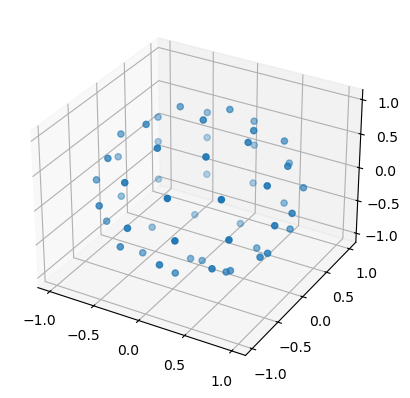

In [4]:
ax = plt.subplot(projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


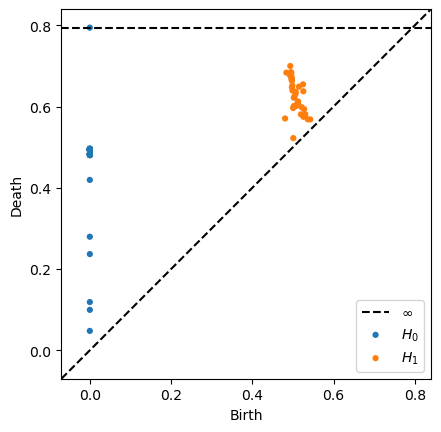

In [5]:
rips = Rips()
diagrams = rips.fit_transform(points)
rips.plot(diagrams)

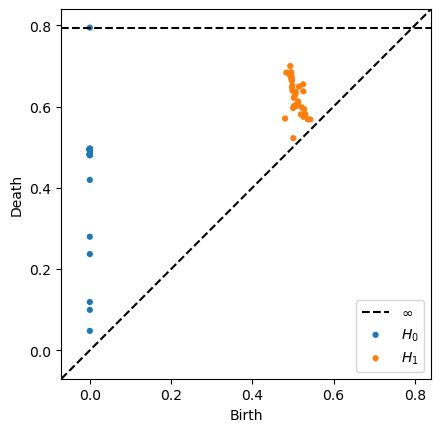

In [6]:
filtration = d.fill_rips(points, 2, 1.)
persistence = d.homology_persistence(filtration)
diagrams = d.init_diagrams(persistence, filtration)
diagrams = [np.array([[p.birth, p.death] for p in diagrams[dim]]) for dim in range(2)]
rips.plot(diagrams)

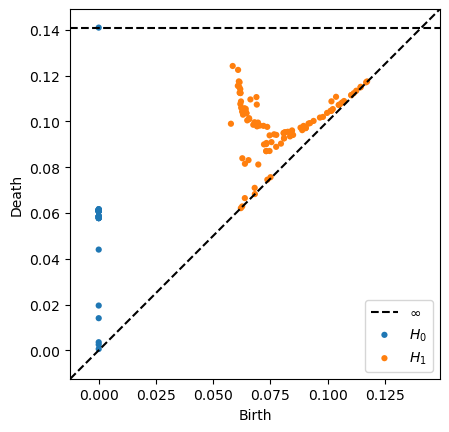

In [7]:
filtration = d.Filtration(diode.fill_alpha_shapes(points))
persistence = d.homology_persistence(filtration)
diagrams = d.init_diagrams(persistence, filtration)
diagrams = [np.array([[p.birth, p.death] for p in diagrams[dim]]) for dim in range(2)]
rips.plot(diagrams)